In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

In retail, R helps analyze sales trends, optimize pricing, predict consumer demand and enhance customer satisfaction. Its statistical and machine learning capabilities allow businesses to make informed decisions based on data.

# Analyzing Food Delivery Data in R

Food delivery services have become an integral part of daily life, with platforms like Zomato, Swiggy, and Foodpanda leading the way. These companies generate large amounts of data that can be analyzed to offer insights. We will demonstrate a comprehensive analysis of a food delivery dataset in the R Programming Language.

 # Project Overview
In this project, we will analyze a food delivery dataset to uncover patterns and trends within the food delivery industry. The dataset contains several key variables, including Delivery Person Age, Ratings, Order Date, Time Taken, and Weather Conditions.

We will:

* Import necessary libraries and load the dataset.
* Clean the dataset by handling missing values and formatting issues.
* Conduct exploratory data analysis (EDA) to visualize key patterns and trends.
* Perform descriptive statistics to better understand delivery times, ratings, and other key variables.
* Analyze various factors that affect food delivery performance, including weather, traffic conditions, and time of day.
* By the end of this analysis, we will gain valuable insights that can help businesses optimize their delivery services and improve customer satisfaction.

1. Importing Libraries
* We will begin by loading the necessary libraries for data manipulation and visualization. We installed and loaded the libraries dplyr, ggplot2, forecast, and car to handle data processing, visualization, and time series analysis.

In [2]:
install.packages(c("forecast","dplyr","car","ggplot2"))

library(dplyr)
library(ggplot2)
library(forecast)
library(car)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




2. Loading the Dataset
* Next, we will load the food delivery dataset into R using the read.csv() function.
* We will display the first few rows to get an overview of the data structure.

In [4]:
food_delivery_data <- read.csv("/kaggle/input/food-dataset/food_delivery_data.csv")

head(food_delivery_data)

,X,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,⋯,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken.min.
,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,0,53796,DEHRES11DEL03,21,4.9,0.00000,0.00000,0.06000,0.06000,15-02-2022,⋯,21:45:00,Sunny,Jam,2,Buffet,motorcycle,0,No,Urban,17
2,1,12502,RANCHIRES18DEL02,23,4.8,23.35149,85.32425,23.37149,85.34425,05-04-2022,⋯,11:05:00,Sunny,Low,2,Drinks,electric_scooter,1,No,Urban,22
3,2,36632,INDORES18DEL02,39,4.6,22.75384,75.89743,22.83384,75.97743,31-03-2022,⋯,17:20:00,Windy,Medium,0,Drinks,motorcycle,0,No,Metropolitian,32
4,3,56274,KOCRES02DEL03,23,4.5,10.02805,76.31002,10.08805,76.37002,15-02-2022,⋯,22:00:00,Sandstorms,Jam,2,Meal,scooter,1,No,Metropolitian,22
5,4,4763,VADRES08DEL01,31,4.2,0.00000,0.00000,0.04000,0.04000,15-03-2022,⋯,14:20:00,Windy,High,0,Buffet,motorcycle,2,No,Urban,41
6,5,8581,PUNERES12DEL01,34,4.9,18.52002,73.83055,18.63002,73.94055,02-03-2022,⋯,23:05:00,Sunny,Low,2,Snack,scooter,1,No,Metropolitian,26


3. Cleaning the Dataset

* We will clean the dataset to ensure its accuracy and prepare it for analysis.
* We will remove any duplicate rows, handle missing values, and convert relevant columns (such as Order_Date and Time_Ordered) into appropriate formats.
*  We will extract the hour from Time_Ordered to analyze peak ordering hours.


In [6]:
food_delivery_data <- food_delivery_data %>% distinct()

food_delivery_data <- food_delivery_data %>%
  mutate(across(everything(), ~ ifelse(is.na(.), mean(., na.rm = TRUE), .)))

food_delivery_data$Order_Date <- as.Date(food_delivery_data$Order_Date, format="%d-%m-%Y")

food_delivery_data$Time_Orderd <- hms::as_hms(food_delivery_data$Time_Orderd)

food_delivery_data$order_hour <- hour(food_delivery_data$Time_Orderd)

4. Performing Exploratory Data Analysis (EDA)
* EDA helps us understand the underlying characteristics of the dataset. We will visualize important patterns and distributions.

4.1. Histogram of Delivery Time
* We will create a histogram of delivery times, a bar plot of delivery person ratings, a pie chart for road traffic density, and more to gain insights into the food delivery process.

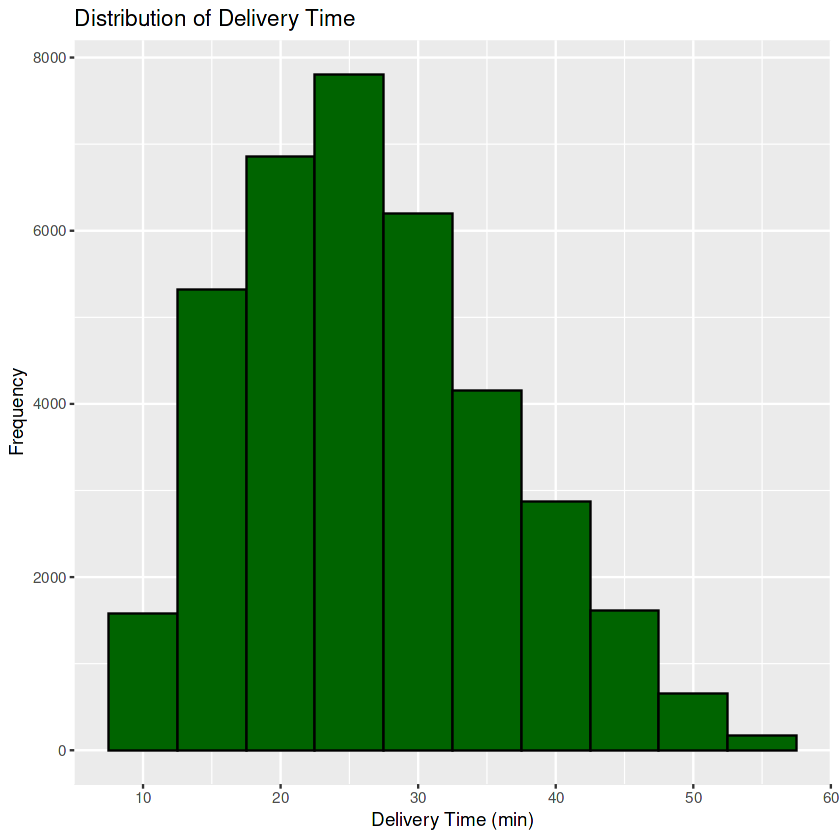

In [7]:
ggplot(food_delivery_data, aes(x = Time_taken.min.)) +
  geom_histogram(binwidth = 5, fill = "darkgreen", color = "black") +
  labs(title = "Distribution of Delivery Time", x = "Delivery Time (min)",y = "Frequency")

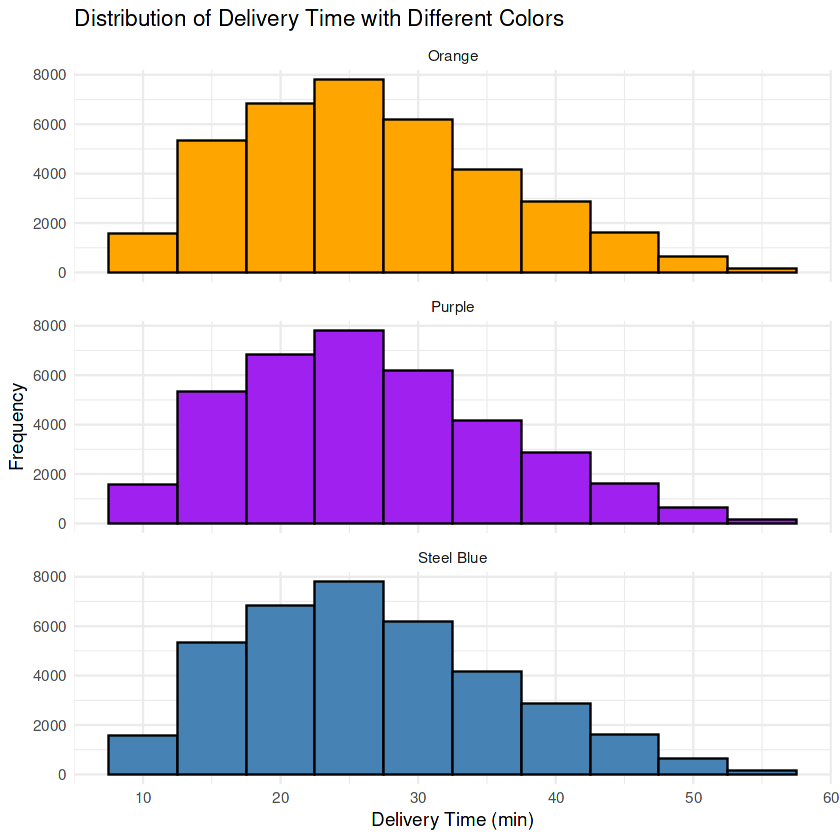

In [9]:
library(ggplot2)
library(dplyr)

# Create a small data frame with colors you want
colors_df <- data.frame(
  palette = c("Steel Blue", "Orange", "Purple"),
  fill_col = c("steelblue", "orange", "purple")
)

# Repeat your data for each palette
plot_data <- food_delivery_data %>%
  crossing(colors_df)

# Plot with facet_wrap
ggplot(plot_data, aes(x = Time_taken.min.)) +
  geom_histogram(binwidth = 5, aes(fill = fill_col), color = "black") +
  scale_fill_identity() +   # use colors as they are
  facet_wrap(~palette, ncol = 1) +
  labs(title = "Distribution of Delivery Time with Different Colors",
       x = "Delivery Time (min)",
       y = "Frequency") +
  theme_minimal()


The histogram shows the distribution of delivery times, revealing the most common delivery durations and providing insights into delivery performance.

4.2. Delivery Person Ratings Distribution
* We will visualize the distribution of delivery person ratings to understand the feedback given to delivery personnel. We will create a bar plot to show the frequency of various delivery person ratings.

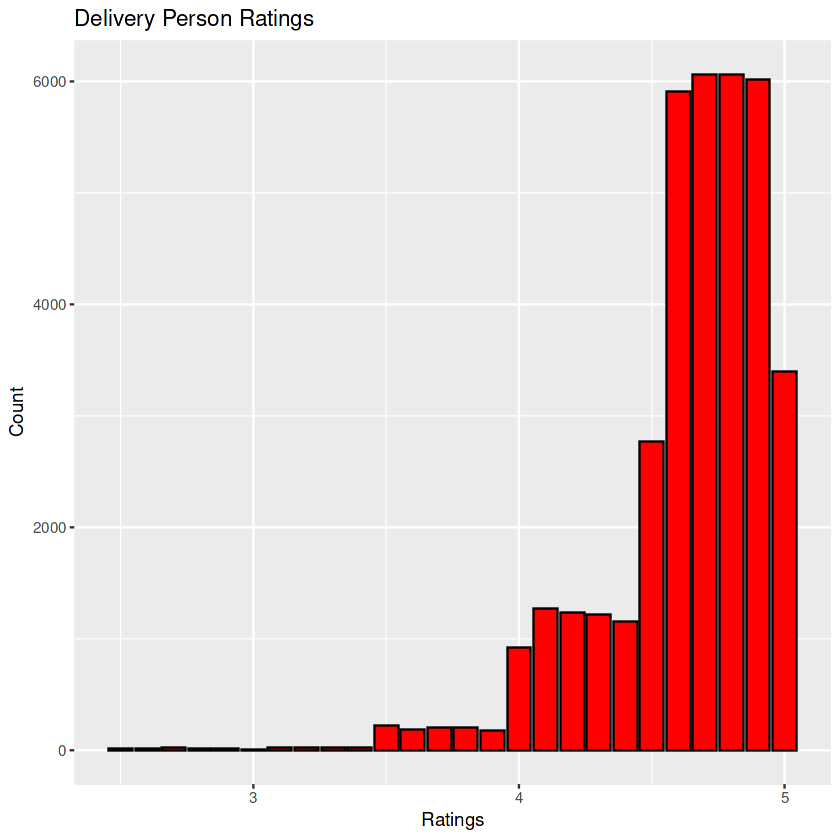

In [10]:
ggplot(food_delivery_data, aes(x = Delivery_person_Ratings)) +
  geom_bar(fill = "red", color = "black") +
  labs(title = "Delivery Person Ratings", x = "Ratings", y = "Count")

The bar plot reveals the distribution of ratings, indicating how delivery personnel are generally rated by customers.

4.3. Orders by Road Traffic Density
* Now we will visualize the Orders by Road Traffic Density by creating a a pie chart to show the proportion of orders under different road traffic conditions.

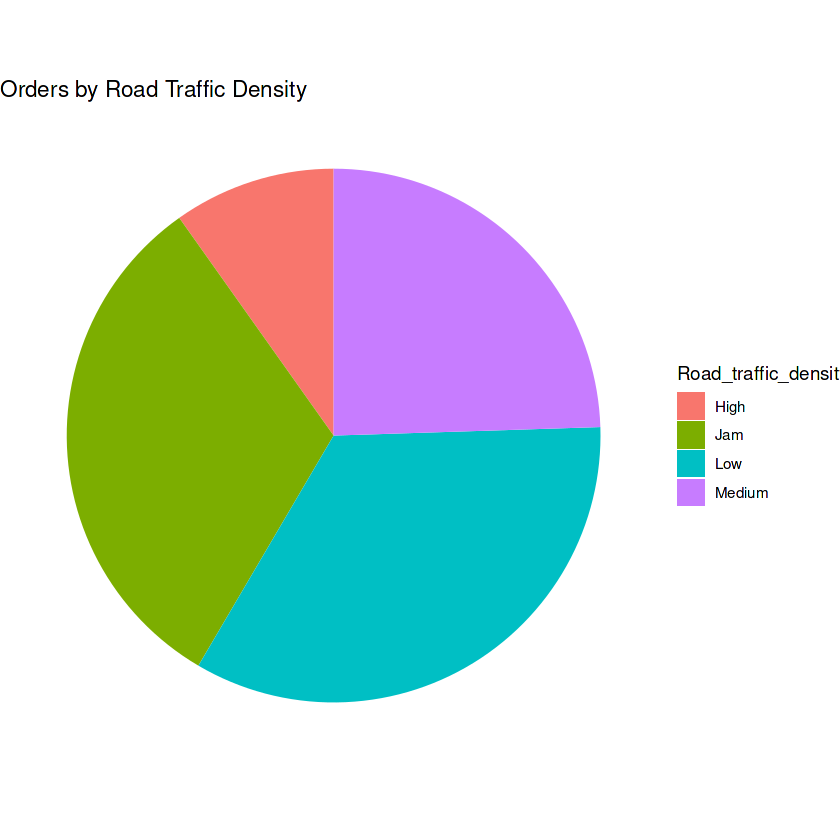

In [11]:
traffic_density_counts <- food_delivery_data %>%
  count(Road_traffic_density) %>%
  mutate(percentage = n / sum(n) * 100)

ggplot(traffic_density_counts, aes(x = "", y = percentage, 
                                   fill = Road_traffic_density)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Orders by Road Traffic Density", x = "", y = "") +
  theme_void()

The pie chart shows how traffic density affects the number of orders, providing insights into delivery challenges during peak traffic hours.

4.4. Distribution of Multiple Deliveries
* Now we will visualize the Distribution of Multiple Deliveries.

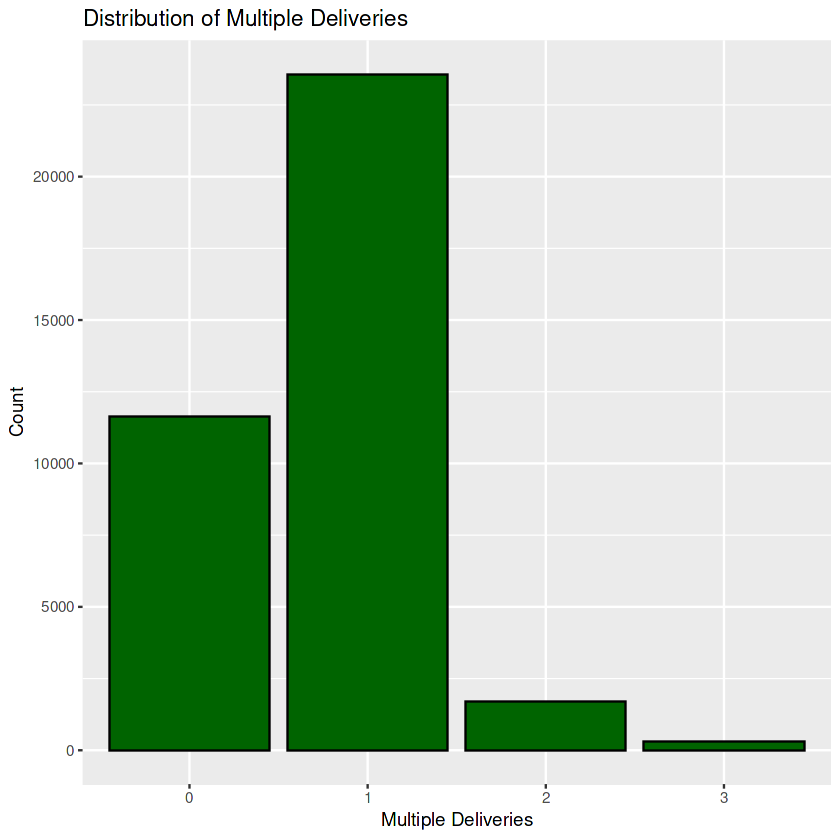

In [12]:
ggplot(food_delivery_data, aes(x = factor(multiple_deliveries))) +
  geom_bar(fill = "darkgreen", color = "black") +
  labs(title = "Distribution of Multiple Deliveries", x = "Multiple Deliveries", 
                                                                      y = "Count")

The bar plot shows that delivery personnel often handle multiple deliveries at a time, providing insights into delivery efficiency.

4.5. Average Delivery Person Ratings by City
* Now we will visualize the Average Delivery Person Ratings by City.

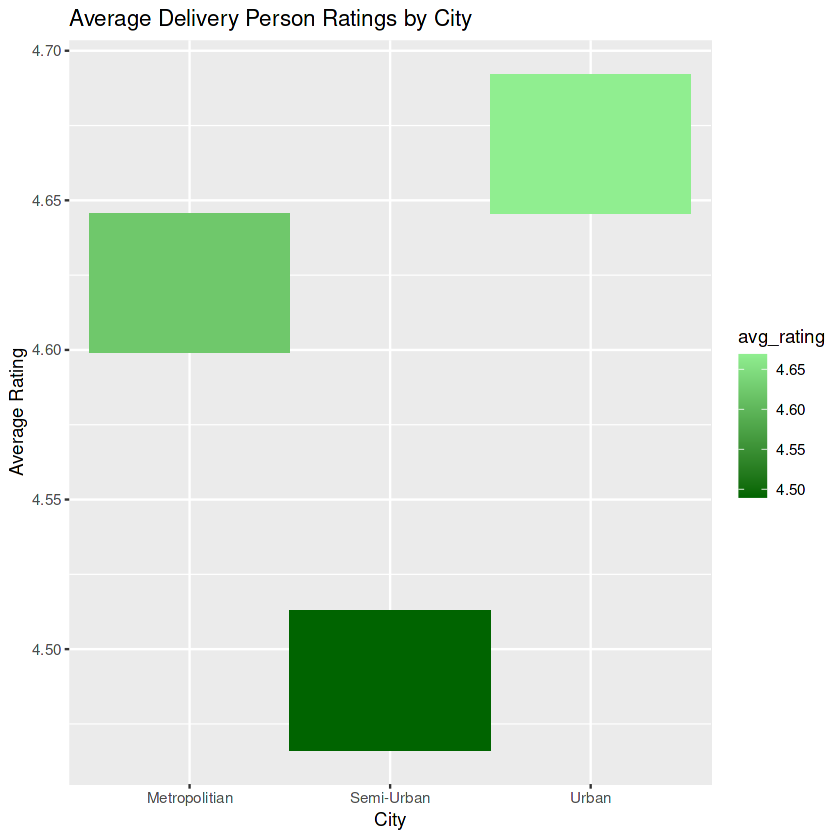

In [13]:
rating_by_city <- food_delivery_data %>%
  group_by(City) %>%
  summarise(avg_rating = mean(Delivery_person_Ratings, na.rm = TRUE))

ggplot(rating_by_city, aes(x = City, y = avg_rating, fill = avg_rating)) +
  geom_tile() +
  scale_fill_gradient(low = "darkgreen", high = "lightgreen") +
  labs(title = "Average Delivery Person Ratings by City", x = "City", 
                                                         y = "Average Rating")

This heatmap visualizes the average ratings of delivery persons in different cities, highlighting cities with higher or lower average ratings.

4.6. Delivery Person Ratings by Weather Conditions
* Now we will visualize the Delivery Person Ratings by Weather Conditions.

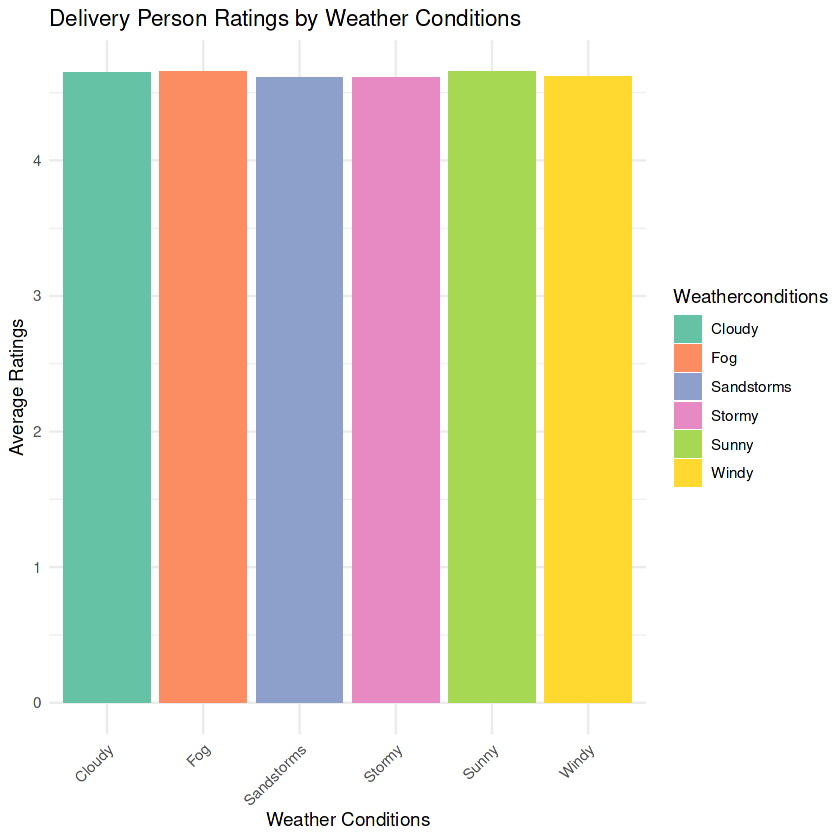

In [15]:
library(ggplot2)
library(dplyr)

# First, compute average ratings per weather condition
avg_ratings <- food_delivery_data %>%
  group_by(Weatherconditions) %>%
  summarise(Average_Rating = mean(Delivery_person_Ratings, na.rm = TRUE))

# Plot with different colors for each bar
ggplot(avg_ratings, aes(x = Weatherconditions, y = Average_Rating, fill = Weatherconditions)) +
  geom_bar(stat = "identity") +
  labs(title = "Delivery Person Ratings by Weather Conditions",
       x = "Weather Conditions", y = "Average Ratings") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_brewer(palette = "Set2")   # nice color palette


This bar plot displays the average ratings of delivery persons under different weather conditions, indicating how weather affects performance.

4.7. Delivery Ratings by Age Group
* Now we will visualize the Delivery Ratings by Age Group.

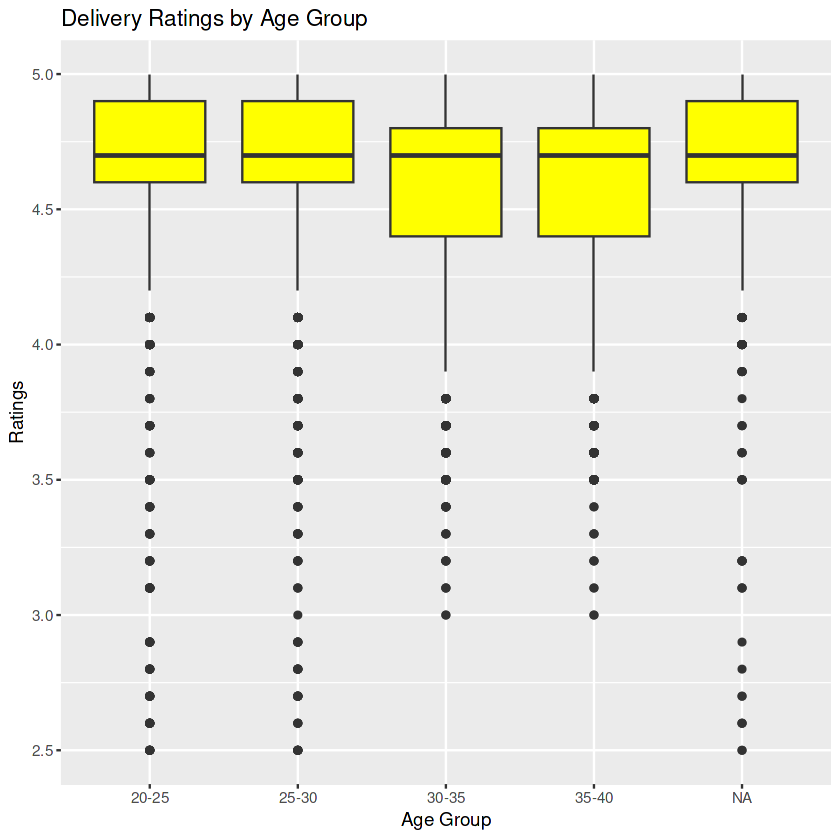

In [16]:
food_delivery_data <- food_delivery_data %>%
  mutate(Age_Group = cut(Delivery_person_Age, breaks = c(20, 25, 30, 35, 40, 45), 
                         labels = c("20-25", "25-30", "30-35", "35-40", "40-45")))

ggplot(food_delivery_data, aes(x = Age_Group, y = Delivery_person_Ratings)) +
  geom_boxplot(fill = "Yellow") +
  labs(title = "Delivery Ratings by Age Group", x = "Age Group",y="Ratings")

This box plot shows the distribution of delivery person ratings for each age group, allowing us to compare the ratings received by different age groups of delivery persons.

# Conclusion
From our analysis, we:

* Identified trends in delivery time, ratings, and traffic conditions.
* Explored how weather conditions and multiple deliveries affect ratings.
* Visualized regional and age-related differences in delivery performance.
* We concluded that delivery times, weather, and traffic play a significant role in customer satisfaction.
* By understanding these patterns, businesses can optimize routes, manage delivery times more effectively, and improve service quality, ultimately enhancing customer retention.

